In [103]:
import numpy as np
from astropy.io import fits
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import astropy.stats as stats
import os
# Creating an empty list for dark files:
files = []

In [104]:
directory = 'C:/Users/ragna/Desktop/sun/fits-Saleh'
# Importing Dark .Fits files:
for filename in os.listdir(directory):
    if filename.endswith(".FITS"):
        filepath = os.path.join(directory, filename)
        # Open the fits file
        file = fits.open(filepath)
        # Get the data from the first extension
        data = file[0].data
        # Apply sigma clipping to the data
        data_clipped = stats.sigma_clip(data, sigma=5, cenfunc='median')
        # Append the clipped data to the darks list
        files.append(data_clipped)

In [105]:
darks = np.sum(files[1:], axis=1)
sun_raw = np.sum(files[0], axis=0)
print(sun_raw.shape)
dark = np.median(darks, axis=0)

# Subtracting noise:
sun = sun_raw - dark

(3465, 5202)


Text(0.5, 1.0, 'Sun in multi-channel')

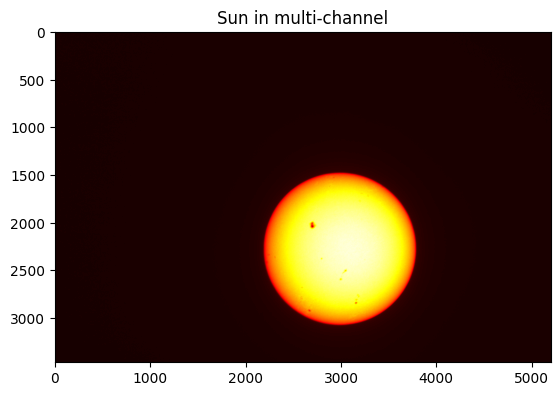

In [106]:
# Plotting fixed Sun image:
plt.imshow(sun, cmap='hot')
plt.title('Sun in multi-channel')

In [107]:
# Cropping image to calculate the CoM more accurately:
sun_cropped = sun[1250:3250, 2000:4000]
sun_cropped.shape


(2000, 2000)

In [108]:
# Center-of-mass longitude:
x = np.arange(1,np.shape(sun)[1]+1)
arr_x = x[:2000]*np.sum(sun_cropped, axis=0)
x_com = np.sum(arr_x)/np.sum(sun) + 2000

# Center-of-mass latitude:
y = np.arange(1,np.shape(sun)[0]+1)
arr_y = y[:2000]*np.sum(sun_cropped, axis=1)
y_com = np.sum(arr_y)/np.sum(sun) + 1250

(x_com,y_com)

(2951.125637439897, 2232.109285755777)

Text(0, 0.5, 'Normalized intensity')

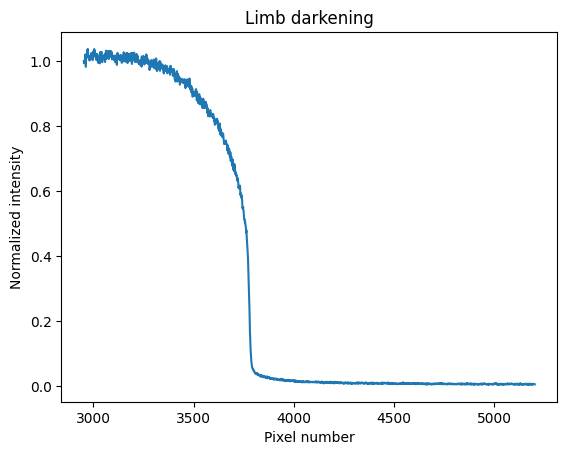

In [109]:
# Plotting the intensity for the central row from the Center-of-mass to the edge of picture:

profile = stats.sigma_clip(sun[2232,2951:], sigma = 5)/sun[2232,2951]
plt.plot(x[2951:], profile)
plt.title('Limb darkening')
plt.xlabel('Pixel number')
plt.ylabel('Normalized intensity')

In [110]:
# Calculating radius by the plot above:

r = 820

In [111]:
# Defining muo from a different way:

muo = np.sqrt(1-(x[:r]/r)**2)
def fit(muo):
    return (2+3*muo)/5

Text(0, 0.5, 'Normalized intensity')

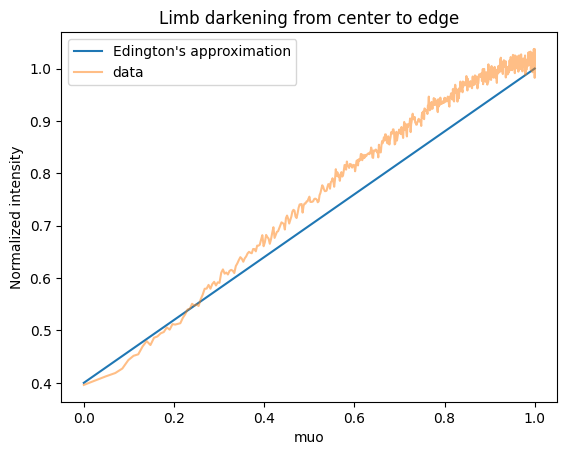

In [112]:
#Plotting the normalized intensity for the same row from CoM to the edge of the sun:

plt.plot(muo[:r], fit(muo), label="Edington's approximation")
plt.plot(muo[:r], profile[:r], alpha=0.5, label='data')
plt.legend()
plt.title('Limb darkening from center to edge')
plt.xlabel('muo')
plt.ylabel('Normalized intensity')

In [121]:
std_out = np.sqrt(np.var(sun[:200, :200]))
median_out = np.median(sun[:200, :200])
std_center = np.sqrt(np.var(sun[2232-100:2232+100,2951-100:2951+100]))
std_edge = np.sqrt(np.var(sun[2232-100:2232+100, 2951+r-100:2951+r+100]))
print('The standard deviation far from the sun = ',round(std_out, 2))
print('The median far from the sun = ', round(median_out, 2))
print('The standard deviation in the center of the sun = ', round(std_center, 2))
print('The standard deviation around the edge of the sun = ', round(std_edge, 2))

The standard deviation far from the sun =  27.42
The median far from the sun =  124.5
The standard deviation in the center of the sun =  398.85
The standard deviation around the edge of the sun =  9251.31
